# 3+1 Simon-Mars tensor in the $\delta=2$ Tomimatsu-Sato spacetime

This worksheet demonstrates a few capabilities of [SageManifolds](http://sagemanifolds.obspm.fr/) (version 1.0, as included in SageMath 7.5) in computations regarding the 3+1 decomposition of the Simon-Mars tensor in the $\delta=2$ Tomimatsu-Sato spacetime. The results obtained here are used in the article [arXiv:1412.6542](http://arxiv.org/abs/1412.6542).

Click [here](https://raw.githubusercontent.com/sagemanifolds/SageManifolds/master/Worksheets/v1.0/SM_Simon-Mars_3p1_TS2.ipynb) to download the worksheet file (ipynb format). To run it, you must start SageMath with the Jupyter notebook, via the command `sage -n jupyter`

*NB:* a version of SageMath at least equal to 7.5 is required to run this worksheet:

In [1]:
version()

'SageMath version 7.5.rc3, Release Date: 2017-01-08'

First we set up the notebook to display mathematical objects using LaTeX rendering:

In [2]:
%display latex

Since some computations are quite long, we ask for running them in parallel on 8 cores:

In [3]:
Parallelism().set(nproc=8)

<h2>Tomimatsu-Sato spacetime</h2>
<p>The Tomimatsu-Sato metric is an exact stationary and axisymmetric  solution of the vacuum Einstein equation, which is asymptotically flat and has a non-zero angular momentum. It has been found in 1972 by A. Tomimatsu and H. Sato [<a href="http://dx.doi.org/10.1103/PhysRevLett.29.1344">Phys. Rev. Lett. <strong>29</strong>, 1344 (1972)</a>], as a solution of the Ernst equation. It is actually the member $\delta=2$ of a larger family of solutions parametrized by a positive integer $\delta$ and exhibited by Tomimatsu and Sato in 1973 <a href="http://dx.doi.org/10.1143/PTP.50.95">[Prog. Theor. Phys. <strong>50</strong>, 95 (1973)</a>], the member $\delta=1$ being nothing but the Kerr metric. We refer to [<a href="http://dx.doi.org/10.1143/PTP.127.1057">Manko, Prog. Theor. Phys.<strong> 127</strong>, 1057 (2012)</a>] for a discussion of the properties of this solution.</p>
<h2>Spacelike hypersurface</h2>
<p>We consider some hypersurface $\Sigma$ of a spacelike foliation $(\Sigma_t)_{t\in\mathbb{R}}$ of $\delta=2$ Tomimatsu-Sato spacetime; we declare $\Sigma_t$ as a 3-dimensional manifold:</p>

In [4]:
Sig = Manifold(3, 'Sigma', r'\Sigma', start_index=1)

<p>On $\Sigma$, we consider the prolate spheroidal <span id="cell_outer_1">coordinates</span> $(x,y,\phi)$, with $x\in(1,+\infty)$, $y\in(-1,1)$ and $\phi\in(0,2\pi)$ :</p>

In [5]:
X.<r,y,ph> = Sig.chart(r'x:(1,+oo) y:(-1,1) ph:(0,2*pi):\phi')
print X ; X

Chart (Sigma, (x, y, ph))


Chart (Sigma, (x, y, ph))

<h3>Riemannian metric on $\Sigma$</h3>
<p>The Tomimatsu-Sato metric depens on three parameters: the integer $\delta$, the real number $p\in[0,1]$, and the total mass $m$:</p>

In [6]:
var('d, p, m')
assume(m>0)
assumptions()

[x is real,
 x > 1,
 y is real,
 y > -1,
 y < 1,
 ph is real,
 ph > 0,
 ph < 2*pi,
 m > 0]

<p>We set $\delta=2$ and choose a specific value for $p$, namely $p=1/5$:</p>

In [7]:
d = 2
p = 1/5

<p>Furthermore, without any loss of generality, we may set $m=1$ (this simply fixes some length scale):</p>

In [8]:
m=1

<p>The parameter $q$ is related to $p$ by $p^2+q^2=1$:</p>

In [9]:
q = sqrt(1-p^2)

<p>Some shortcut notations:</p>

In [10]:
AA2 = (p^2*(x^2-1)^2+q^2*(1-y^2)^2)^2-4*p^2*q^2*(x^2-1)*(1-y^2)*(x^2-y^2)^2
BB2 = (p^2*x^4+2*p*x^3-2*p*x+q^2*y^4-1)^2+4*q^2*y^2*(p*x^3-p*x*y^2-y^2+1)^2
CC2 = p^3*x*(1-x^2)*(2*(x^4-1)+(x^2+3)*(1-y^2))+p^2*(x^2-1)*((x^2-1)*(1-y^2)-4*x^2*(x^2-y^2))+q^2*(1-y^2)^3*(p*x+1)

<p>The Riemannian metric $\gamma$ induced by the spacetime metric $g$ on $\Sigma$:</p>

In [11]:
gam = Sig.riemannian_metric('gam', latex_name=r'\gamma') 
gam[1,1] = m^2*BB2/(p^2*d^2*(x^2-1)*(x^2-y^2)^3)
gam[2,2] = m^2*BB2/(p^2*d^2*(y^2-1)*(-x^2+y^2)^3)
gam[3,3] = - m^2*(y^2-1)*(p^2*BB2^2*(x^2-1)+4*q^2*d^2*CC2^2*(y^2-1))/(AA2*BB2*d^2)
gam.display()

gam = 1/100*(96*(x^3 - x*y^2 - 5*y^2 + 5)^2*y^2 + (x^4 + 24*y^4 + 10*x^3 - 10*x - 25)^2)/((x^2 - y^2)^3*(x^2 - 1)) dx*dx - 1/100*(96*(x^3 - x*y^2 - 5*y^2 + 5)^2*y^2 + (x^4 + 24*y^4 + 10*x^3 - 10*x - 25)^2)/((x^2 - y^2)^3*(y^2 - 1)) dy*dy - 1/100*((96*(x^3 - x*y^2 - 5*y^2 + 5)^2*y^2 + (x^4 + 24*y^4 + 10*x^3 - 10*x - 25)^2)^2*(x^2 - 1) + 9600*(24*(y^2 - 1)^3*(x + 5) + (2*x^4 - (x^2 + 3)*(y^2 - 1) - 2)*(x^2 - 1)*x + 5*(4*(x^2 - y^2)*x^2 + (x^2 - 1)*(y^2 - 1))*(x^2 - 1))^2*(y^2 - 1))*(y^2 - 1)/((96*(x^2 - y^2)^2*(x^2 - 1)*(y^2 - 1) + ((x^2 - 1)^2 + 24*(y^2 - 1)^2)^2)*(96*(x^3 - x*y^2 - 5*y^2 + 5)^2*y^2 + (x^4 + 24*y^4 + 10*x^3 - 10*x - 25)^2)) dph*dph

A view of the non-vanishing components of $\gamma$ w.r.t. coordinates $(x,y,\phi)$:

In [12]:
gam.display_comp()

gam_x,x = 1/100*(96*(x^3 - x*y^2 - 5*y^2 + 5)^2*y^2 + (x^4 + 24*y^4 + 10*x^3 - 10*x - 25)^2)/((x^2 - y^2)^3*(x^2 - 1)) 
gam_y,y = -1/100*(96*(x^3 - x*y^2 - 5*y^2 + 5)^2*y^2 + (x^4 + 24*y^4 + 10*x^3 - 10*x - 25)^2)/((x^2 - y^2)^3*(y^2 - 1)) 
gam_ph,ph = -1/100*((96*(x^3 - x*y^2 - 5*y^2 + 5)^2*y^2 + (x^4 + 24*y^4 + 10*x^3 - 10*x - 25)^2)^2*(x^2 - 1) + 9600*(24*(y^2 - 1)^3*(x + 5) + (2*x^4 - (x^2 + 3)*(y^2 - 1) - 2)*(x^2 - 1)*x + 5*(4*(x^2 - y^2)*x^2 + (x^2 - 1)*(y^2 - 1))*(x^2 - 1))^2*(y^2 - 1))*(y^2 - 1)/((96*(x^2 - y^2)^2*(x^2 - 1)*(y^2 - 1) + ((x^2 - 1)^2 + 24*(y^2 - 1)^2)^2)*(96*(x^3 - x*y^2 - 5*y^2 + 5)^2*y^2 + (x^4 + 24*y^4 + 10*x^3 - 10*x - 25)^2))

In [13]:
gam.determinant().expr()

1/1000000*(x^18 + 60*x^17 + 331776*(x^2 - 1)*y^16 + 1599*x^16 + 25880*x^15 + 110592*(x^4 + 15*x^3 + 99*x^2 + 485*x + 1200)*y^14 + 266700*x^14 + 1555560*x^13 - 9216*(17*x^6 + 60*x^5 - 417*x^4 - 3040*x^3 - 13425*x^2 - 31020*x - 16975)*y^12 + 3533300*x^12 - 4005000*x^11 + 9216*(9*x^8 - 60*x^7 - 509*x^6 - 2430*x^5 - 9525*x^4 - 24260*x^3 - 71775*x^2 - 227250*x - 290600)*y^10 - 17787450*x^10 - 18420000*x^9 + 5760*(7*x^10 + 90*x^9 + 473*x^8 + 2460*x^7 + 10050*x^6 + 15200*x^5 + 53790*x^4 + 120900*x^3 + 198455*x^2 + 741350*x + 1103625)*y^8 + 15656250*x^8 + 31485000*x^7 - 192*(143*x^12 + 675*x^11 - 1043*x^10 - 7575*x^9 - 52650*x^8 - 224850*x^7 - 156150*x^6 + 1001250*x^5 + 3726075*x^4 + 6217375*x^3 + 4145625*x^2 + 19413125*x + 33330000)*y^6 + 3527500*x^6 + 12975000*x^5 + 96*(93*x^14 - 105*x^13 - 1693*x^12 - 13470*x^11 - 99575*x^10 - 222675*x^9 - 149025*x^8 - 1024500*x^7 - 2270025*x^6 + 2366625*x^5 + 9545625*x^4 + 11931250*x^3 + 451875*x^2 + 11346875*x + 28273125)*y^4 + 80032500*x^4 + 102025000*x^3 + 192*(x^16 + 30*x^15 + 399*x^14 + 3955*x^13 + 19950*x^12 + 3765*x^11 + 19850*x^10 + 197000*x^9 + 47025*x^8 + 77000*x^7 + 646875*x^6 - 598125*x^5 - 2642500*x^4 - 2896875*x^3 + 1117500*x^2 + 1581250*x - 687500)*y^2 - 78609375*x^2 - 180937500*x - 150390625)/(x^14 + (x^2 - 1)*y^12 - x^12 - 6*(x^4 - x^2)*y^10 + 15*(x^6 - x^4)*y^8 - 20*(x^8 - x^6)*y^6 + 15*(x^10 - x^8)*y^4 - 6*(x^12 - x^10)*y^2)

In [14]:
from sage.manifolds.utilities import simplify_chain_real
mdetg = - gam.determinant().expr()
smdetg = sqrt(mdetg)
smdetg

1/1000*sqrt(-(x^18 + 60*x^17 + 331776*(x^2 - 1)*y^16 + 1599*x^16 + 25880*x^15 + 110592*(x^4 + 15*x^3 + 99*x^2 + 485*x + 1200)*y^14 + 266700*x^14 + 1555560*x^13 - 9216*(17*x^6 + 60*x^5 - 417*x^4 - 3040*x^3 - 13425*x^2 - 31020*x - 16975)*y^12 + 3533300*x^12 - 4005000*x^11 + 9216*(9*x^8 - 60*x^7 - 509*x^6 - 2430*x^5 - 9525*x^4 - 24260*x^3 - 71775*x^2 - 227250*x - 290600)*y^10 - 17787450*x^10 - 18420000*x^9 + 5760*(7*x^10 + 90*x^9 + 473*x^8 + 2460*x^7 + 10050*x^6 + 15200*x^5 + 53790*x^4 + 120900*x^3 + 198455*x^2 + 741350*x + 1103625)*y^8 + 15656250*x^8 + 31485000*x^7 - 192*(143*x^12 + 675*x^11 - 1043*x^10 - 7575*x^9 - 52650*x^8 - 224850*x^7 - 156150*x^6 + 1001250*x^5 + 3726075*x^4 + 6217375*x^3 + 4145625*x^2 + 19413125*x + 33330000)*y^6 + 3527500*x^6 + 12975000*x^5 + 96*(93*x^14 - 105*x^13 - 1693*x^12 - 13470*x^11 - 99575*x^10 - 222675*x^9 - 149025*x^8 - 1024500*x^7 - 2270025*x^6 + 2366625*x^5 + 9545625*x^4 + 11931250*x^3 + 451875*x^2 + 11346875*x + 28273125)*y^4 + 80032500*x^4 + 102025000*x^3 + 192*(x^16 + 30*x^15 + 399*x^14 + 3955*x^13 + 19950*x^12 + 3765*x^11 + 19850*x^10 + 197000*x^9 + 47025*x^8 + 77000*x^7 + 646875*x^6 - 598125*x^5 - 2642500*x^4 - 2896875*x^3 + 1117500*x^2 + 1581250*x - 687500)*y^2 - 78609375*x^2 - 180937500*x - 150390625)/(x^14 + (x^2 - 1)*y^12 - x^12 - 6*(x^4 - x^2)*y^10 + 15*(x^6 - x^4)*y^8 - 20*(x^8 - x^6)*y^6 + 15*(x^10 - x^8)*y^4 - 6*(x^12 - x^10)*y^2))

In [15]:
expr = smdetg
expr = expr.simplify_factorial()
expr = expr.simplify_trig()
expr = expr.simplify_rational()
expr
#simplify_chain_real(smdetg)

1/1000*sqrt(-(x^18 + 60*x^17 + 331776*(x^2 - 1)*y^16 + 1599*x^16 + 25880*x^15 + 110592*(x^4 + 15*x^3 + 99*x^2 + 485*x + 1200)*y^14 + 266700*x^14 + 1555560*x^13 - 9216*(17*x^6 + 60*x^5 - 417*x^4 - 3040*x^3 - 13425*x^2 - 31020*x - 16975)*y^12 + 3533300*x^12 - 4005000*x^11 + 9216*(9*x^8 - 60*x^7 - 509*x^6 - 2430*x^5 - 9525*x^4 - 24260*x^3 - 71775*x^2 - 227250*x - 290600)*y^10 - 17787450*x^10 - 18420000*x^9 + 5760*(7*x^10 + 90*x^9 + 473*x^8 + 2460*x^7 + 10050*x^6 + 15200*x^5 + 53790*x^4 + 120900*x^3 + 198455*x^2 + 741350*x + 1103625)*y^8 + 15656250*x^8 + 31485000*x^7 - 192*(143*x^12 + 675*x^11 - 1043*x^10 - 7575*x^9 - 52650*x^8 - 224850*x^7 - 156150*x^6 + 1001250*x^5 + 3726075*x^4 + 6217375*x^3 + 4145625*x^2 + 19413125*x + 33330000)*y^6 + 3527500*x^6 + 12975000*x^5 + 96*(93*x^14 - 105*x^13 - 1693*x^12 - 13470*x^11 - 99575*x^10 - 222675*x^9 - 149025*x^8 - 1024500*x^7 - 2270025*x^6 + 2366625*x^5 + 9545625*x^4 + 11931250*x^3 + 451875*x^2 + 11346875*x + 28273125)*y^4 + 80032500*x^4 + 102025000*x^3 + 192*(x^16 + 30*x^15 + 399*x^14 + 3955*x^13 + 19950*x^12 + 3765*x^11 + 19850*x^10 + 197000*x^9 + 47025*x^8 + 77000*x^7 + 646875*x^6 - 598125*x^5 - 2642500*x^4 - 2896875*x^3 + 1117500*x^2 + 1581250*x - 687500)*y^2 - 78609375*x^2 - 180937500*x - 150390625)/(x^14 + (x^2 - 1)*y^12 - x^12 - 6*(x^4 - x^2)*y^10 + 15*(x^6 - x^4)*y^8 - 20*(x^8 - x^6)*y^6 + 15*(x^10 - x^8)*y^4 - 6*(x^12 - x^10)*y^2))

In [16]:
from sage.manifolds.utilities import simplify_sqrt_real
expr = simplify_sqrt_real(expr)

In [17]:
print(expr)

1/1000*sqrt(-x^10 - 40*x^9 - 576*(x^2 - 1)*y^8 - 699*x^8 - 7920*x^7 - 96*(x^4 + 20*x^3 + 174*x^2 + 980*x + 2425)*y^6 - 39450*x^6 + 960*x^5 + 48*(3*x^6 + 20*x^5 - 3*x^4 + 40*x^3 + 925*x^2 + 5940*x + 14675)*y^4 + 39450*x^4 + 6000*x^3 - 96*(x^8 - x^6 + 20*x^5 - 20*x^3 + 375*x^2 + 3000*x + 7425)*y^2 + 9675*x^2 + 97000*x + 240625)*sqrt(x^8 + 576*y^8 + 20*x^7 + 96*(x^2 + 10*x + 25)*y^6 + 100*x^6 - 20*x^5 - 48*(3*x^4 + 10*x^3 + 30*x + 125)*y^4 - 250*x^4 - 500*x^3 + 96*(x^6 + 10*x^3 + 25)*y^2 + 100*x^2 + 500*x + 625)/(sqrt(x + 1)*sqrt(x - 1)*abs(-x^6 + 3*x^4*y^2 - 3*x^2*y^4 + y^6))


In [18]:
gam.sqrt_abs_det().expr()

1/1000*sqrt(x^10 + 40*x^9 + 576*(x^2 - 1)*y^8 + 699*x^8 + 7920*x^7 + 96*(x^4 + 20*x^3 + 174*x^2 + 980*x + 2425)*y^6 + 39450*x^6 - 960*x^5 - 48*(3*x^6 + 20*x^5 - 3*x^4 + 40*x^3 + 925*x^2 + 5940*x + 14675)*y^4 - 39450*x^4 - 6000*x^3 + 96*(x^8 - x^6 + 20*x^5 - 20*x^3 + 375*x^2 + 3000*x + 7425)*y^2 - 9675*x^2 - 97000*x - 240625)*sqrt(x^8 + 576*y^8 + 20*x^7 + 96*(x^2 + 10*x + 25)*y^6 + 100*x^6 - 20*x^5 - 48*(3*x^4 + 10*x^3 + 30*x + 125)*y^4 - 250*x^4 - 500*x^3 + 96*(x^6 + 10*x^3 + 25)*y^2 + 100*x^2 + 500*x + 625)/(sqrt(x + 1)*sqrt(x - 1)*abs(-x^6 + 3*x^4*y^2 - 3*x^2*y^4 + y^6))

In [19]:
print(gam.volume_form())

3-form eps_gam on the 3-dimensional differentiable manifold Sigma


<h3>Lapse function and shift vector</h3>

In [20]:
N2 = AA2/BB2 - 2*m*q*CC2*(y^2-1)/BB2*(2*m*q*CC2*(y^2-1)/(BB2*(m^2*(y^2-1)*(p^2*BB2^2*(x^2-1)+4*q^2*d^2*CC2^2*(y^2-1))/(AA2*BB2*d^2))))
N2.simplify_full()

(x^10 + 20*x^9 + 576*(x^2 - 1)*y^8 + 99*x^8 - 40*x^7 + 96*(x^4 + 10*x^3 + 24*x^2 - 10*x - 25)*y^6 - 350*x^6 - 480*x^5 - 48*(3*x^6 + 10*x^5 - 3*x^4 + 20*x^3 + 125*x^2 - 30*x - 125)*y^4 + 350*x^4 + 1000*x^3 + 96*(x^8 - x^6 + 10*x^5 - 10*x^3 + 25*x^2 - 25)*y^2 + 525*x^2 - 500*x - 625)/(x^10 + 40*x^9 + 576*(x^2 - 1)*y^8 + 699*x^8 + 7920*x^7 + 96*(x^4 + 20*x^3 + 174*x^2 + 980*x + 2425)*y^6 + 39450*x^6 - 960*x^5 - 48*(3*x^6 + 20*x^5 - 3*x^4 + 40*x^3 + 925*x^2 + 5940*x + 14675)*y^4 - 39450*x^4 - 6000*x^3 + 96*(x^8 - x^6 + 20*x^5 - 20*x^3 + 375*x^2 + 3000*x + 7425)*y^2 - 9675*x^2 - 97000*x - 240625)

In [21]:
N = Sig.scalar_field(sqrt(N2.simplify_full()), name='N')
print N
N.display()

Scalar field N on the 3-dimensional differentiable manifold Sigma


N: Sigma --> R
   (x, y, ph) |--> sqrt((x^10 + 20*x^9 + 576*(x^2 - 1)*y^8 + 99*x^8 - 40*x^7 + 96*(x^4 + 10*x^3 + 24*x^2 - 10*x - 25)*y^6 - 350*x^6 - 480*x^5 - 48*(3*x^6 + 10*x^5 - 3*x^4 + 20*x^3 + 125*x^2 - 30*x - 125)*y^4 + 350*x^4 + 1000*x^3 + 96*(x^8 - x^6 + 10*x^5 - 10*x^3 + 25*x^2 - 25)*y^2 + 525*x^2 - 500*x - 625)/(x^10 + 40*x^9 + 576*(x^2 - 1)*y^8 + 699*x^8 + 7920*x^7 + 96*(x^4 + 20*x^3 + 174*x^2 + 980*x + 2425)*y^6 + 39450*x^6 - 960*x^5 - 48*(3*x^6 + 20*x^5 - 3*x^4 + 40*x^3 + 925*x^2 + 5940*x + 14675)*y^4 - 39450*x^4 - 6000*x^3 + 96*(x^8 - x^6 + 20*x^5 - 20*x^3 + 375*x^2 + 3000*x + 7425)*y^2 - 9675*x^2 - 97000*x - 240625))

The coordinate expression of the scalar field $N$:

In [22]:
N.expr()

sqrt((x^10 + 20*x^9 + 576*(x^2 - 1)*y^8 + 99*x^8 - 40*x^7 + 96*(x^4 + 10*x^3 + 24*x^2 - 10*x - 25)*y^6 - 350*x^6 - 480*x^5 - 48*(3*x^6 + 10*x^5 - 3*x^4 + 20*x^3 + 125*x^2 - 30*x - 125)*y^4 + 350*x^4 + 1000*x^3 + 96*(x^8 - x^6 + 10*x^5 - 10*x^3 + 25*x^2 - 25)*y^2 + 525*x^2 - 500*x - 625)/(x^10 + 40*x^9 + 576*(x^2 - 1)*y^8 + 699*x^8 + 7920*x^7 + 96*(x^4 + 20*x^3 + 174*x^2 + 980*x + 2425)*y^6 + 39450*x^6 - 960*x^5 - 48*(3*x^6 + 20*x^5 - 3*x^4 + 40*x^3 + 925*x^2 + 5940*x + 14675)*y^4 - 39450*x^4 - 6000*x^3 + 96*(x^8 - x^6 + 20*x^5 - 20*x^3 + 375*x^2 + 3000*x + 7425)*y^2 - 9675*x^2 - 97000*x - 240625))

In [23]:
b3 = 2*m*q*CC2*(y^2-1)/(BB2*(m^2*(y^2-1)*(p^2*BB2^2*(x^2-1)+4*q^2*d^2*CC2^2*(y^2-1))/(AA2*BB2*d^2)))
b = Sig.vector_field('beta', latex_name=r'\beta') 
b[3] = b3.simplify_full()
# unset components are zero 
b.display_comp(only_nonzero=False)

beta^x = 0 
beta^y = 0 
beta^ph = -400*(2*sqrt(6)*x^7 + 24*(sqrt(6)*x + 5*sqrt(6))*y^6 + 20*sqrt(6)*x^6 - sqrt(6)*x^5 - 72*(sqrt(6)*x + 5*sqrt(6))*y^4 - 25*sqrt(6)*x^4 - (sqrt(6)*x^5 + 15*sqrt(6)*x^4 + 2*sqrt(6)*x^3 - 10*sqrt(6)*x^2 - 75*sqrt(6)*x - 365*sqrt(6))*y^2 + 10*sqrt(6)*x^2 - 25*sqrt(6)*x - 125*sqrt(6))/(x^10 + 40*x^9 + 576*(x^2 - 1)*y^8 + 699*x^8 + 7920*x^7 + 96*(x^4 + 20*x^3 + 174*x^2 + 980*x + 2425)*y^6 + 39450*x^6 - 960*x^5 - 48*(3*x^6 + 20*x^5 - 3*x^4 + 40*x^3 + 925*x^2 + 5940*x + 14675)*y^4 - 39450*x^4 - 6000*x^3 + 96*(x^8 - x^6 + 20*x^5 - 20*x^3 + 375*x^2 + 3000*x + 7425)*y^2 - 9675*x^2 - 97000*x - 240625)

<h3>Extrinsic curvature of $\Sigma$</h3>
<p>We use the formula $$K_{ij} = \frac{1}{2N} \mathcal{L}_{\beta} \gamma_{ij}, $$ which is valid for any stationary spacetime:</p>

In [24]:
K = gam.lie_derivative(b) / (2*N)
K.set_name('K')
print K

Field of symmetric bilinear forms K on the 3-dimensional differentiable manifold Sigma


<p>The component $K_{13} = K_{x\phi}$:</p>

In [25]:
K[1,3]

2*(6*sqrt(3)*sqrt(2)*x^16 - 13824*(sqrt(3)*sqrt(2)*x^2 + 10*sqrt(3)*sqrt(2)*x + sqrt(3)*sqrt(2))*y^16 + 240*sqrt(3)*sqrt(2)*x^15 + 3793*sqrt(3)*sqrt(2)*x^14 - 6912*(sqrt(3)*sqrt(2)*x^4 + 20*sqrt(3)*sqrt(2)*x^3 + 150*sqrt(3)*sqrt(2)*x^2 + 500*sqrt(3)*sqrt(2)*x + 817*sqrt(3)*sqrt(2))*y^14 + 27650*sqrt(3)*sqrt(2)*x^13 + 72403*sqrt(3)*sqrt(2)*x^12 + 576*(27*sqrt(3)*sqrt(2)*x^6 + 310*sqrt(3)*sqrt(2)*x^5 + 1033*sqrt(3)*sqrt(2)*x^4 + 1060*sqrt(3)*sqrt(2)*x^3 + 10493*sqrt(3)*sqrt(2)*x^2 + 44870*sqrt(3)*sqrt(2)*x + 69503*sqrt(3)*sqrt(2))*y^12 - 81820*sqrt(3)*sqrt(2)*x^11 - 374975*sqrt(3)*sqrt(2)*x^10 - 96*(109*sqrt(3)*sqrt(2)*x^8 + 520*sqrt(3)*sqrt(2)*x^7 + 1504*sqrt(3)*sqrt(2)*x^6 + 19360*sqrt(3)*sqrt(2)*x^5 + 92770*sqrt(3)*sqrt(2)*x^4 + 157960*sqrt(3)*sqrt(2)*x^3 + 148264*sqrt(3)*sqrt(2)*x^2 + 731920*sqrt(3)*sqrt(2)*x + 1256425*sqrt(3)*sqrt(2))*y^10 - 313810*sqrt(3)*sqrt(2)*x^9 + 669975*sqrt(3)*sqrt(2)*x^8 + 24*(9*sqrt(3)*sqrt(2)*x^10 + 250*sqrt(3)*sqrt(2)*x^9 + 6873*sqrt(3)*sqrt(2)*x^8 + 40920*sqrt(3)*sqrt(2)*x^7 + 63402*sqrt(3)*sqrt(2)*x^6 + 146220*sqrt(3)*sqrt(2)*x^5 + 1047426*sqrt(3)*sqrt(2)*x^4 + 2249400*sqrt(3)*sqrt(2)*x^3 + 876525*sqrt(3)*sqrt(2)*x^2 + 4308810*sqrt(3)*sqrt(2)*x + 8401925*sqrt(3)*sqrt(2))*y^8 + 1617000*sqrt(3)*sqrt(2)*x^7 + 999675*sqrt(3)*sqrt(2)*x^6 + 96*(20*sqrt(3)*sqrt(2)*x^11 - 179*sqrt(3)*sqrt(2)*x^10 - 50*sqrt(3)*sqrt(2)*x^9 - 2897*sqrt(3)*sqrt(2)*x^8 - 28400*sqrt(3)*sqrt(2)*x^7 - 57446*sqrt(3)*sqrt(2)*x^6 - 9020*sqrt(3)*sqrt(2)*x^5 - 237650*sqrt(3)*sqrt(2)*x^4 - 731060*sqrt(3)*sqrt(2)*x^3 - 267175*sqrt(3)*sqrt(2)*x^2 - 1037250*sqrt(3)*sqrt(2)*x - 2111325*sqrt(3)*sqrt(2))*y^6 - 2277250*sqrt(3)*sqrt(2)*x^5 - 4979375*sqrt(3)*sqrt(2)*x^4 - (187*sqrt(3)*sqrt(2)*x^14 + 3590*sqrt(3)*sqrt(2)*x^13 - 5207*sqrt(3)*sqrt(2)*x^12 - 73540*sqrt(3)*sqrt(2)*x^11 - 454637*sqrt(3)*sqrt(2)*x^10 - 1150150*sqrt(3)*sqrt(2)*x^9 + 199401*sqrt(3)*sqrt(2)*x^8 - 1059000*sqrt(3)*sqrt(2)*x^7 - 7811175*sqrt(3)*sqrt(2)*x^6 + 2899610*sqrt(3)*sqrt(2)*x^5 + 1675075*sqrt(3)*sqrt(2)*x^4 - 32834500*sqrt(3)*sqrt(2)*x^3 - 24681575*sqrt(3)*sqrt(2)*x^2 - 69684250*sqrt(3)*sqrt(2)*x - 122823125*sqrt(3)*sqrt(2))*y^4 - 4037500*sqrt(3)*sqrt(2)*x^3 + 3461875*sqrt(3)*sqrt(2)*x^2 - 6*(sqrt(3)*sqrt(2)*x^16 + 40*sqrt(3)*sqrt(2)*x^15 + 601*sqrt(3)*sqrt(2)*x^14 + 4010*sqrt(3)*sqrt(2)*x^13 + 12935*sqrt(3)*sqrt(2)*x^12 - 1060*sqrt(3)*sqrt(2)*x^11 + 10449*sqrt(3)*sqrt(2)*x^10 + 139590*sqrt(3)*sqrt(2)*x^9 + 57825*sqrt(3)*sqrt(2)*x^8 + 146960*sqrt(3)*sqrt(2)*x^7 + 781475*sqrt(3)*sqrt(2)*x^6 - 702250*sqrt(3)*sqrt(2)*x^5 - 2108075*sqrt(3)*sqrt(2)*x^4 - 348500*sqrt(3)*sqrt(2)*x^3 + 2381875*sqrt(3)*sqrt(2)*x^2 + 5456250*sqrt(3)*sqrt(2)*x + 6941250*sqrt(3)*sqrt(2))*y^2 + 7231250*sqrt(3)*sqrt(2)*x + 6109375*sqrt(3)*sqrt(2))*sqrt(x^10 + 40*x^9 + 576*(x^2 - 1)*y^8 + 699*x^8 + 7920*x^7 + 96*(x^4 + 20*x^3 + 174*x^2 + 980*x + 2425)*y^6 + 39450*x^6 - 960*x^5 - 48*(3*x^6 + 20*x^5 - 3*x^4 + 40*x^3 + 925*x^2 + 5940*x + 14675)*y^4 - 39450*x^4 - 6000*x^3 + 96*(x^8 - x^6 + 20*x^5 - 20*x^3 + 375*x^2 + 3000*x + 7425)*y^2 - 9675*x^2 - 97000*x - 240625)/((x^18 + 60*x^17 + 331776*(x^2 - 1)*y^16 + 1599*x^16 + 25880*x^15 + 110592*(x^4 + 15*x^3 + 99*x^2 + 485*x + 1200)*y^14 + 266700*x^14 + 1555560*x^13 - 9216*(17*x^6 + 60*x^5 - 417*x^4 - 3040*x^3 - 13425*x^2 - 31020*x - 16975)*y^12 + 3533300*x^12 - 4005000*x^11 + 9216*(9*x^8 - 60*x^7 - 509*x^6 - 2430*x^5 - 9525*x^4 - 24260*x^3 - 71775*x^2 - 227250*x - 290600)*y^10 - 17787450*x^10 - 18420000*x^9 + 5760*(7*x^10 + 90*x^9 + 473*x^8 + 2460*x^7 + 10050*x^6 + 15200*x^5 + 53790*x^4 + 120900*x^3 + 198455*x^2 + 741350*x + 1103625)*y^8 + 15656250*x^8 + 31485000*x^7 - 192*(143*x^12 + 675*x^11 - 1043*x^10 - 7575*x^9 - 52650*x^8 - 224850*x^7 - 156150*x^6 + 1001250*x^5 + 3726075*x^4 + 6217375*x^3 + 4145625*x^2 + 19413125*x + 33330000)*y^6 + 3527500*x^6 + 12975000*x^5 + 96*(93*x^14 - 105*x^13 - 1693*x^12 - 13470*x^11 - 99575*x^10 - 222675*x^9 - 149025*x^8 - 1024500*x^7 - 2270025*x^6 + 2366625*x^5 + 9545625*x^4 + 11931250*x^3 + 451875*x^2 + 11346875*x + 2

<p>The type-(1,1) tensor $K^\sharp$ of components $K^i_{\ \, j} = \gamma^{ik} K_{kj}$:</p>

In [26]:
Ku = K.up(gam, 0)
print Ku

Tensor field of type (1,1) on the 3-dimensional differentiable manifold Sigma


<p>We may check that the hypersurface $\Sigma$ is maximal, i.e. that $K^k_{\ \, k} = 0$:</p>

In [27]:
trK = Ku.trace()
trK

Scalar field zero on the 3-dimensional differentiable manifold Sigma

<h3>Connection and curvature</h3>
<p>Let us call $D$ the Levi-Civita connection associated with $\gamma$: </p>

In [28]:
D = gam.connection(name='D')
print D

Levi-Civita connection D associated with the Riemannian metric gam on the 3-dimensional differentiable manifold Sigma


<p>The Ricci tensor associated with $\gamma$:</p>

In [29]:
Ric = gam.ricci()
print Ric

Field of symmetric bilinear forms Ric(gam) on the 3-dimensional differentiable manifold Sigma


<p>The scalar curvature $R = \gamma^{ij} R_{ij}$:</p>

In [30]:
R = gam.ricci_scalar(name='R')
print R

Scalar field R on the 3-dimensional differentiable manifold Sigma


<h3>Terms related to the extrinsic curvature</h3>
<p>Let us first evaluate the term $K_{ij} K^{ij}$:</p>

In [31]:
Kuu = Ku.up(gam, 1)
trKK = K['_ij']*Kuu['^ij']
print trKK

Scalar field on the 3-dimensional differentiable manifold Sigma


<p>Then we compute the symmetric bilinear form $k_{ij} := K_{ik} K^k_{\ \, j}$:</p>

In [32]:
KK = K['_ik']*Ku['^k_j']
print KK

Tensor field of type (0,2) on the 3-dimensional differentiable manifold Sigma


<p>We check that this tensor field is symmetric:</p>

In [33]:
KK1 = KK.symmetrize()
KK == KK1

True

<p>Accordingly, we work with the explicitly symmetric version:</p>

In [34]:
KK = KK1
print KK

Field of symmetric bilinear forms on the 3-dimensional differentiable manifold Sigma


<p> </p>
<h2>Electric and magnetic parts of the Weyl tensor</h2>
<p>The electric part is the bilinear form $E$ given by $$ E_{ij} = R_{ij} + K K_{ij} - K_{ik} K^k_{\ \, j} $$</p>

In [35]:
E = Ric + trK*K - KK
print E

Field of symmetric bilinear forms on the 3-dimensional differentiable manifold Sigma


<p>The magnetic part is the bilinear form $B$ defined by $$ B_{ij} = \epsilon^k_{\ \, l i} D_k K^l_{\ \, j}, $$</p>
<p>where $\epsilon^k_{\ \, l i}$ are the components of the type-(1,2) tensor $\epsilon^\sharp$, related to the Levi-Civita alternating tensor $\epsilon$ associated with $\gamma$ by $\epsilon^k_{\ \, l i} = \gamma^{km} \epsilon_{m l i}$. In SageManifolds, $\epsilon$ is obtained by the command <span style="font-family: courier new,courier;">volume_form()</span> and $\epsilon^\sharp$ by the command <span style="font-family: courier new,courier;">volume_form(1)</span> (1 = 1 index raised):</p>

In [36]:
eps = gam.volume_form() 
print eps

3-form eps_gam on the 3-dimensional differentiable manifold Sigma


In [37]:
epsu = gam.volume_form(1)
print epsu

Tensor field of type (1,2) on the 3-dimensional differentiable manifold Sigma


In [38]:
DKu = D(Ku)
B = epsu['^k_li']*DKu['^l_jk'] 
print B

Tensor field of type (0,2) on the 3-dimensional differentiable manifold Sigma


<p>Let us check that $B$ is symmetric:</p>

In [39]:
B1 = B.symmetrize()
B == B1

True

<p>Accordingly, we set</p>

In [40]:
B = B1
B.set_name('B')
print B

Field of symmetric bilinear forms B on the 3-dimensional differentiable manifold Sigma


<h2>3+1 decomposition of the Simon-Mars tensor</h2>
<p>We proceed according to the computation presented in <a href="http://arxiv.org/abs/1412.6542">arXiv:1412.6542</a>.</p>
<p>Tensor $E^\sharp$ of components $E^i_ {\ \, j}$:</p>

In [41]:
Eu = E.up(gam, 0) 
print Eu

Tensor field of type (1,1) on the 3-dimensional differentiable manifold Sigma


<p>Tensor $B^\sharp$ of components $B^i_{\ \, j}$:</p>

In [42]:
Bu = B.up(gam, 0)
print Bu

Tensor field of type (1,1) on the 3-dimensional differentiable manifold Sigma


<p>1-form $\beta^\flat$ of components $\beta_i$ and its exterior derivative:</p>

In [43]:
bd = b.down(gam)
xdb = bd.exterior_derivative()
print xdb

2-form on the 3-dimensional differentiable manifold Sigma


<p>Scalar square of shift $\beta_i \beta^i$:</p>

In [44]:
b2 = bd(b)
print b2

Scalar field on the 3-dimensional differentiable manifold Sigma


<p>Scalar $Y = E(\beta,\beta) = E_{ij} \beta^i \beta^j$:</p>

In [45]:
Ebb = E(b,b)
Y = Ebb
print Y

Scalar field on the 3-dimensional differentiable manifold Sigma


<p>Scalar $\bar Y = B(\beta,\beta) = B_{ij}\beta^i \beta^j$:</p>

In [46]:
Bbb = B(b,b)
Y_bar = Bbb
print Y_bar

Scalar field B(beta,beta) on the 3-dimensional differentiable manifold Sigma


<p>1-form of components $Eb_i = E_{ij} \beta^j$:</p>

In [47]:
Eb = E.contract(b)
print Eb

1-form on the 3-dimensional differentiable manifold Sigma


<p>Vector field of components $Eub^i = E^i_{\ \, j} \beta^j$:</p>

In [48]:
Eub = Eu.contract(b)
print Eub

Vector field on the 3-dimensional differentiable manifold Sigma


<p>1-form of components $Bb_i = B_{ij} \beta^j$:</p>

In [49]:
Bb = B.contract(b)
print Bb

1-form on the 3-dimensional differentiable manifold Sigma


<p>Vector field of components $Bub^i = B^i_{\ \, j} \beta^j$:</p>

In [50]:
Bub = Bu.contract(b)
print Bub

Vector field on the 3-dimensional differentiable manifold Sigma


<p>Vector field of components $Kub^i = K^i_{\ \, j} \beta^j$:</p>

In [51]:
Kub = Ku.contract(b)
print Kub

Vector field on the 3-dimensional differentiable manifold Sigma


In [52]:
T = 2*b(N) - 2*K(b,b)
print T ; T.display()

Scalar field zero on the 3-dimensional differentiable manifold Sigma


zero: Sigma --> R
   (x, y, ph) |--> 0

In [53]:
Db = D(b)  #  Db^i_j = D_j b^i
Dbu = Db.up(gam, 1)  # Dbu^{ij} = D^j b^i
bDb = b*Dbu  # bDb^{ijk} = b^i D^k b^j
T_bar = eps['_ijk']*bDb['^ikj']
print T_bar ; T_bar.display()

Scalar field zero on the 3-dimensional differentiable manifold Sigma


zero: Sigma --> R
   (x, y, ph) |--> 0

In [54]:
epsb = eps.contract(b) 
print epsb

2-form on the 3-dimensional differentiable manifold Sigma


In [55]:
epsB = eps['_ijl']*Bu['^l_k']
print epsB

Tensor field of type (0,3) on the 3-dimensional differentiable manifold Sigma


In [56]:
Z = 2*N*( D(N)  -K.contract(b)) + b.contract(xdb)
print Z

1-form on the 3-dimensional differentiable manifold Sigma


In [57]:
DNu = D(N).up(gam)
A = 2*(DNu - Ku.contract(b))*b + N*Dbu
Z_bar = eps['_ijk']*A['^kj']
print Z_bar

1-form on the 3-dimensional differentiable manifold Sigma


In [58]:
W = N*Eb + epsb.contract(Bub)
print W

1-form on the 3-dimensional differentiable manifold Sigma


In [59]:
W_bar = N*Bb - epsb.contract(Eub)
print W_bar

1-form on the 3-dimensional differentiable manifold Sigma


In [60]:
M = - 4*Eb(Kub - DNu) - 2*(epsB['_ij.']*Dbu['^ji'])(b)
print M ; M.display()

Scalar field zero on the 3-dimensional differentiable manifold Sigma


zero: Sigma --> R
   (x, y, ph) |--> 0

In [61]:
M_bar = 2*(eps.contract(Eub))['_ij']*Dbu['^ji'] - 4*Bb(Kub - DNu)
print M_bar ; M_bar.display()

Scalar field zero on the 3-dimensional differentiable manifold Sigma


zero: Sigma --> R
   (x, y, ph) |--> 0

In [62]:
F = (N^2 - b2)*gam + bd*bd
print F

Field of symmetric bilinear forms on the 3-dimensional differentiable manifold Sigma


In [63]:
A = epsB['_ilk']*b['^l'] + epsB['_ikl']*b['^l'] + Bu['^m_i']*epsb['_mk'] - 2*N*E
xdbE = xdb['_kl']*Eu['^k_i']
L = 2*N*epsB['_kli']*Dbu['^kl'] + 2*xdb['_ij']*Eub['^j'] + 2*xdbE['_li']*b['^l'] \
    + 2*A['_ik']*(Kub - DNu)['^k']
print L

1-form on the 3-dimensional differentiable manifold Sigma


In [64]:
N2pbb = N^2 + b2
V = N2pbb*E - 2*(b.contract(E)*bd).symmetrize() + Ebb*gam + 2*N*(b.contract(epsB).symmetrize())
print V

Field of symmetric bilinear forms on the 3-dimensional differentiable manifold Sigma


In [65]:
beps = b.contract(eps)
V_bar = N2pbb*B - 2*(b.contract(B)*bd).symmetrize() + Bbb*gam \
        -2*N*(beps['_il']*Eu['^l_j']).symmetrize()
print V_bar

Field of symmetric bilinear forms on the 3-dimensional differentiable manifold Sigma


In [66]:
F = (N^2 - b2)*gam + bd*bd
print F

Field of symmetric bilinear forms on the 3-dimensional differentiable manifold Sigma


In [67]:
R1 = (4*(V*Z - V_bar*Z_bar) + F*L).antisymmetrize(1,2)
print R1

Tensor field of type (0,3) on the 3-dimensional differentiable manifold Sigma


In [68]:
R2 = 4*(T*V - T_bar*V_bar - W*Z + W_bar*Z_bar) + M*F - N*bd*L
print R2

Tensor field of type (0,2) on the 3-dimensional differentiable manifold Sigma


In [69]:
R3 = (4*(W*Z - W_bar*Z_bar) + N*bd*L).antisymmetrize()
print R3

2-form on the 3-dimensional differentiable manifold Sigma


In [70]:
R2[3,1] == -2*R3[3,1]

True

In [71]:
R2[3,2] == -2*R3[3,2]

True

In [72]:
R4 = 4*(T*W - T_bar*W_bar) -4*(Y*Z - Y_bar*Z_bar) + N*M*bd - b2*L
print R4

1-form on the 3-dimensional differentiable manifold Sigma


In [73]:
epsE = eps['_ijl']*Eu['^l_k']
print epsE

Tensor field of type (0,3) on the 3-dimensional differentiable manifold Sigma


In [74]:
A = - epsE['_ilk']*b['^l'] - epsE['_ikl']*b['^l'] - Eu['^m_i']*epsb['_mk'] - 2*N*B
xdbB = xdb['_kl']*Bu['^k_i']
L_bar = - 2*N*epsE['_kli']*Dbu['^kl'] + 2*xdb['_ij']*Bub['^j'] + 2*xdbB['_li']*b['^l'] \
    + 2*A['_ik']*(Kub - DNu)['^k']
print L_bar

1-form on the 3-dimensional differentiable manifold Sigma


In [75]:
R1_bar = (4*(V*Z_bar + V_bar*Z) + F*L_bar).antisymmetrize(1,2)
print R1_bar

Tensor field of type (0,3) on the 3-dimensional differentiable manifold Sigma


In [76]:
R2_bar = 4*(T_bar*V + T*V_bar) - 4*(W*Z_bar + W_bar*Z) + M_bar*F - N*bd*L_bar
print R2_bar

Tensor field of type (0,2) on the 3-dimensional differentiable manifold Sigma


In [77]:
R3_bar = (4*(W*Z_bar + W_bar*Z) + N*bd*L_bar).antisymmetrize()
print R3_bar

2-form on the 3-dimensional differentiable manifold Sigma


In [78]:
R4_bar = 4*(T_bar*W + T*W_bar - Y*Z_bar - Y_bar*Z) + M_bar*N*bd - b2*L_bar
print R4_bar

1-form on the 3-dimensional differentiable manifold Sigma


In [79]:
R1u = R1.up(gam)
print R1u

Tensor field of type (3,0) on the 3-dimensional differentiable manifold Sigma


In [80]:
R2u = R2.up(gam)
print R2u

Tensor field of type (2,0) on the 3-dimensional differentiable manifold Sigma


In [81]:
R3u = R3.up(gam)
print R3u

Tensor field of type (2,0) on the 3-dimensional differentiable manifold Sigma


In [82]:
R4u = R4.up(gam)
print R4u

Vector field on the 3-dimensional differentiable manifold Sigma


In [83]:
R1_baru = R1_bar.up(gam)
print R1_baru

Tensor field of type (3,0) on the 3-dimensional differentiable manifold Sigma


In [84]:
R2_baru = R2_bar.up(gam)
print R2_baru

Tensor field of type (2,0) on the 3-dimensional differentiable manifold Sigma


In [85]:
R3_baru = R3_bar.up(gam)
print R3_baru

Tensor field of type (2,0) on the 3-dimensional differentiable manifold Sigma


In [86]:
R4_baru = R4_bar.up(gam)
print R4_baru

Vector field on the 3-dimensional differentiable manifold Sigma


<h3>Simon-Mars scalars</h3>

In [87]:
S1 = 4*(R1['_ijk']*R1u['^ijk'] - R1_bar['_ijk']*R1_baru['^ijk'] - 2*(R2['_ij']*R2u['^ij'] \
     - R2_bar['_ij']*R2_baru['^ij']) - R3['_ij']*R3u['^ij'] + R3_bar['_ij']*R3_baru['^ij'] \
     + 2*(R4['_i']*R4u['^i'] - R4_bar['_i']*R4_baru['^i']))
print S1

Scalar field on the 3-dimensional differentiable manifold Sigma


In [88]:
S1E = S1.expr()

In [89]:
S2 = 4*(R1['_ijk']*R1_baru['^ijk'] + R1_bar['_ijk']*R1u['^ijk'] - 2*(R2['_ij']*R2_baru['^ij'] \
     + R2_bar['_ij']*R2u['^ij']) - R3['_ij']*R3_baru['^ij'] - R3_bar['_ij']*R3u['^ij'] \
     + 2*(R4['_i']*R4_baru['^i'] + R4_bar['_i']*R4u['^i']))
print S2

Scalar field on the 3-dimensional differentiable manifold Sigma


In [90]:
S2E = S2.expr()

In [91]:
lS1E = log(S1E,10).simplify_full()

In [92]:
lS2E = log(S2E,10).simplify_full()

<p>Simon-Mars scalars expressed in terms of the coordinates $X=-1/x,y$:</p>

In [93]:
var('X')
S1EX = S1E.subs(x=-1/X).simplify_full()
S2EX = S2E.subs(x=-1/X).simplify_full()

<p>Definition of the ergoregion:</p>

In [94]:
g00 = - AA2/BB2
g00X = g00.subs(x=-1/X).simplify_full()

In [95]:
ergXy = implicit_plot(g00X, (X,-1,0), (y,-1,1), plot_points=200, fill=False, 
                      linewidth=1, color='black', 
                      axes_labels=(r"$X\,\left[M^{-1}\right]$", r"$y\,\left[M\right]$"), 
                      fontsize=14)

<p>Due to the very high degree of the polynomials involved in the expression of the Simon-Mars scalars, the floating-point precision of Sage's <span style="font-family: courier new,courier;">contour_plot</span> function (53 bits) is not sufficient. Taking avantage that Sage is <strong>open-source</strong>, we modify the function to allow for an arbitrary precision. First, we define a sampling function with a floating-point precision specified by the user (argument <span style="font-family: courier new,courier;">precis</span>): </p>

In [96]:
def array_precisXy(fXy, Xmin, Xmax, ymin, ymax, np, precis, tronc):
    RP = RealField(precis)
    Xmin = RP(Xmin)
    Xmax = RP(Xmax)
    ymin = RP(ymin)
    ymax = RP(ymax)
    dX = (Xmax - Xmin) / RP(np-1)
    dy = (ymax - ymin) / RP(np-1)
    resu = []
    for i in range(np):
        list_y = []
        yy = ymin + dy * RP(i)
        fyy = fXy.subs(y=yy)
        for j in range(np):
            XX = Xmin + dX * RP(j)
            fyyXX = fyy.subs(X = XX)
            val = RP(log(abs(fyyXX) + 1e-20, 10))
            if val < -tronc:
                val = -tronc
            elif val > tronc:
                val = tronc
            list_y.append(val)
        resu.append(list_y)
    return resu

<p>Then we redefine <span style="font-family: courier new,courier;">contour_plot</span> so that it uses the sampling function with a floating-point precision of 200 bits:</p>

In [97]:
from sage.misc.decorators import options, suboptions

@suboptions('colorbar', orientation='vertical', format=None, spacing=None)
@suboptions('label', fontsize=9, colors='blue', inline=None, inline_spacing=3, fmt="%1.2f")
@options(plot_points=100, fill=True, contours=None, linewidths=None, linestyles=None, 
         labels=False, frame=True, axes=False, colorbar=False, legend_label=None, 
         aspect_ratio=1)
def contour_plot_precisXy(f, xrange, yrange, **options):
    from sage.plot.all import Graphics
    from sage.plot.misc import setup_for_eval_on_grid
    from sage.plot.contour_plot import ContourPlot

    np = options['plot_points']
    precis = 200  # floating-point precision = 200 bits 
    tronc = 10
    xy_data_array = array_precisXy(f, xrange[0], xrange[1], yrange[0], yrange[1], np, precis, 
                                   tronc)

    g = Graphics()

    # Reset aspect_ratio to 'automatic' in case scale is 'semilog[xy]'.
    # Otherwise matplotlib complains.
    scale = options.get('scale', None)
    if isinstance(scale, (list, tuple)):
        scale = scale[0]
    if scale == 'semilogy' or scale == 'semilogx':
        options['aspect_ratio'] = 'automatic'

    g._set_extra_kwds(Graphics._extract_kwds_for_show(options, ignore=['xmin', 'xmax']))
    g.add_primitive(ContourPlot(xy_data_array, xrange, yrange, options))
    return g

<p>Then we are able to draw the contour plot of the two Simon-Mars scalars, in terms of the coordinates $(X,y)$ (Figure 11 of <a href="http://arxiv.org/abs/1412.6542">arXiv:1412.6542</a>):</p>

In [98]:
c1Xy = contour_plot_precisXy(S1EX, (-1,0), (-1,1), plot_points=200, fill=False, cmap='hsv', 
                             linewidths=1, 
                             contours=(-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8), 
                             colorbar=True, colorbar_spacing='uniform', colorbar_format='%1.f', 
                             axes_labels=(r"$X\,\left[M^{-1}\right]$", r"$y\,\left[M\right]$"), 
                             fontsize=14)

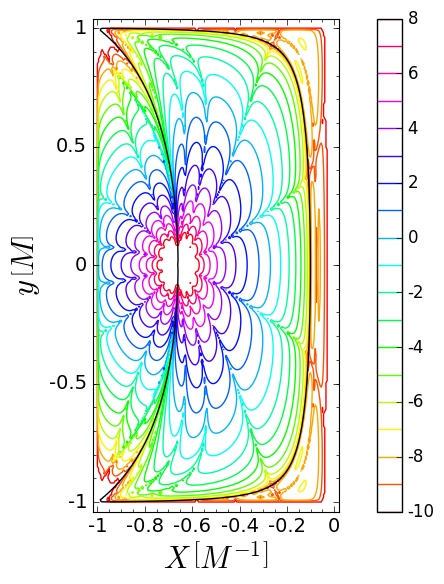

In [99]:
S1TSXy = c1Xy+ergXy
show(S1TSXy)

In [100]:
c2Xy = contour_plot_precisXy(S2EX, (-1,0), (-1,1), plot_points=200, fill=False, cmap='hsv', 
                             linewidths=1, 
                             contours=(-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10), 
                             colorbar=True, colorbar_spacing='uniform', colorbar_format='%1.f', 
                             axes_labels=(r"$X\,\left[M^{-1}\right]$", r"$y\,\left[M\right]$"), 
                             fontsize=14)

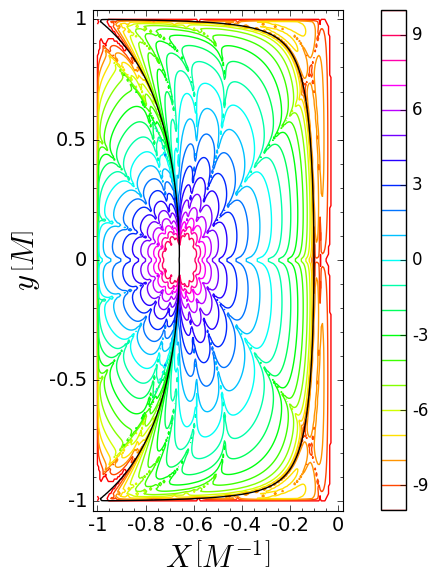

In [101]:
S2TSXy = c2Xy + ergXy
show(S2TSXy)

<p>Let us do the same in terms of the Weyl-Lewis-Papapetrou cylindrical coordinates $(\rho,z)$, which are related to the prolate spheroidal coordinates $(x,y)$ by $$ \rho = \sqrt{(x^2-1)(1-y^2)}  \quad\mbox{and}\quad z=xy . $$ </p>
<p>For simplicity, we denote $\rho$ by $r$:</p>

In [102]:
var('r z')

(r, z)

In [103]:
S1Erz = S1E.subs(x=1/2*(sqrt(r^2+(z+1)^2)+sqrt(r^2+(z-1)^2)), 
                 y=1/2*(sqrt(r^2+(z+1)^2)-sqrt(r^2+(z-1)^2)))
S1Erz = S1Erz.simplify_full()

In [104]:
S2Erz = S2E.subs(x=1/2*(sqrt(r^2+(z+1)^2)+sqrt(r^2+(z-1)^2)), 
                 y=1/2*(sqrt(r^2+(z+1)^2)-sqrt(r^2+(z-1)^2)))
S2Erz = S2Erz.simplify_full()

In [105]:
def tab_precis(fz, zz, rmin, rmax, np, precis, tronc):
    RP = RealField(precis)
    rmin = RP(rmin)
    rmax = RP(rmax)
    zz = RP(zz)
    dr = (rmax - rmin) / RP(np-1)
    resu = []
    fzz = fz.subs(z=zz)
    for i in range(np):
        rr = rmin + dr * RP(i)
        val = RP(log(abs(fzz.subs(r = rr)), 10))
        if val < -tronc:
            val = -tronc
        elif val > tronc:
            val = tronc
        resu.append((rr, zz, val))
    return resu

### 3D plots

We also a viewer for 3D plots (use `'threejs'` or `'jmol'` for interactive 3D graphics):

In [115]:
viewer3D = 'threejs' # must be 'threejs', jmol', 'tachyon' or None (default)

In [116]:
gg = Graphics()
rmin = 0.1
rmax = 3
zmin = -2
zmax = 2
npr = 200
npz = npr
precis = 200 # 200-bits floating-point precision
tronc = 5
dz = (zmax-zmin) / (npz-1)
for i in range(npz):
    zz = zmin + i*dz
    gg += line3d(tab_precis(S1Erz, zz, rmin, rmax, npr, precis, tronc))
show(gg, viewer=viewer3D, axes_labels=['rho', 'z', 'S_1'], aspect_ratio=[1,1,0.3])

Graphics3d Object

In [119]:
gg2 = Graphics()
for i in range(npz):
    zz = zmin + i*dz
    gg2 += line3d(tab_precis(S2Erz, zz, rmin, rmax, npr, precis, tronc))
show(gg2, viewer=viewer3D, axes_labels=['rho', 'z', 'S_2'], aspect_ratio=[1,1,0.3])

KeyboardInterrupt: 

### 2D contour plots

Contour plots of the two Simon-Mars scalar fields in terms of coordinates $(\rho,z)$ (Figure 12 of <a href="http://arxiv.org/abs/1412.6542">arXiv:1412.6542</a>)

In [108]:
def array_precis(frz, rmin, rmax, zmin, zmax, np, precis, tronc):
    RP = RealField(precis)
    rmin = RP(rmin)
    rmax = RP(rmax)
    zmin = RP(zmin)
    zmax = RP(zmax)
    dr = (rmax - rmin) / RP(np-1)
    dz = (zmax - zmin) / RP(np-1)
    resu = []
    for i in range(np):
        list_z = []
        zz = zmin + dz * RP(i)
        fzz = frz.subs(z=zz)
        for j in range(np):
            rr = rmin + dr * RP(j)
            fzzrr = fzz.subs(r = rr)
            val = RP(log(abs(fzzrr) + 1e-20, 10))
            if val < -tronc:
                val = -tronc
            elif val > tronc:
                val = tronc
            list_z.append(val)
        resu.append(list_z)
    return resu

In [109]:
rmin = 0.1
rmax = 3
zmin = -2
zmax = 2
npr = 10
npz = npr
precis = 100
tronc = 5
val = array_precis(S1Erz, rmin, rmax, zmin, zmax, npr, precis, tronc)

In [110]:
from sage.misc.decorators import options, suboptions

@suboptions('colorbar', orientation='vertical', format=None, spacing=None)
@suboptions('label', fontsize=9, colors='blue', inline=None, inline_spacing=3, fmt="%1.2f")
@options(plot_points=100, fill=True, contours=None, linewidths=None, linestyles=None, 
         labels=False, frame=True, axes=False, colorbar=False, legend_label=None, 
         aspect_ratio=1)
def contour_plot_precis(f, xrange, yrange, **options):
    from sage.plot.all import Graphics
    from sage.plot.misc import setup_for_eval_on_grid
    from sage.plot.contour_plot import ContourPlot

    np = options['plot_points']
    precis = 200
    tronc = 10
    xy_data_array = array_precis(f, xrange[0], xrange[1], yrange[0], yrange[1], np, precis, 
                                 tronc)

    g = Graphics()

    # Reset aspect_ratio to 'automatic' in case scale is 'semilog[xy]'.
    # Otherwise matplotlib complains.
    scale = options.get('scale', None)
    if isinstance(scale, (list, tuple)):
        scale = scale[0]
    if scale == 'semilogy' or scale == 'semilogx':
        options['aspect_ratio'] = 'automatic'

    g._set_extra_kwds(Graphics._extract_kwds_for_show(options, ignore=['xmin', 'xmax']))
    g.add_primitive(ContourPlot(xy_data_array, xrange, yrange, options))
    return g

In [111]:
c1rz = contour_plot_precis(S1Erz, (0.0001,10), (-5,5.001), plot_points=300, fill=False, 
                           cmap='hsv', linewidths=1, 
                           contours=(-10,-9,-8,-7,-6,-5.5,-5,-4.5,-4,-3.5,-3,-2.5,-2,-1.5,-1,
                                     -0.5,0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5), 
                           colorbar=True, colorbar_spacing='uniform', colorbar_format='%1.f', 
                           axes_labels=(r"$\rho\,\left[M\right]$", r"$z\,\left[M\right]$"), 
                           fontsize=14)

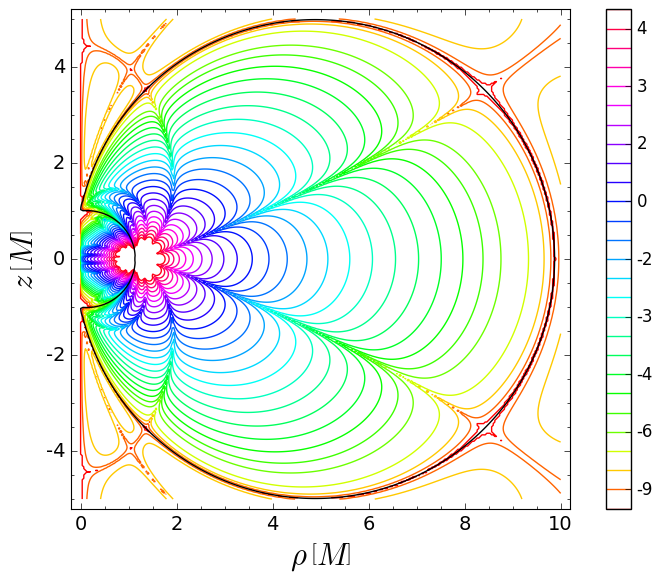

In [114]:
g00rz = g00.subs(x=1/2*(sqrt(r^2+(z+1)^2)+sqrt(r^2+(z-1)^2)), 
                 y=1/2*(sqrt(r^2+(z+1)^2)-sqrt(r^2+(z-1)^2))).simplify_full()
c2 = implicit_plot(g00rz, (r,0.0001,10), (z,-5,5.001), plot_points=200, fill=False, 
                   linewidth=1, color='black', 
                   axes_labels=(r"$\rho\,\left[M\right]$", r"$z\,\left[M\right]$"), fontsize=14)
S1TSrz = c1rz+c2
show(S1TSrz)

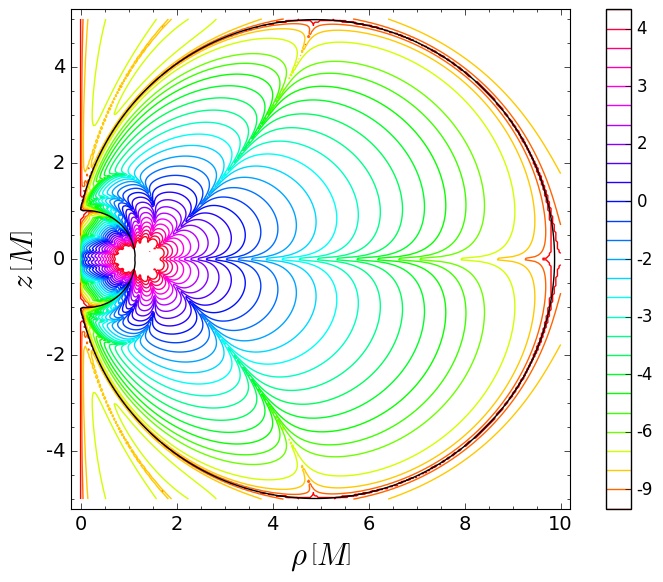

In [113]:
c2rz = contour_plot_precis(S2Erz, (0.0001,10), (-5,5.001), plot_points=300, fill=False, 
                           cmap='hsv', linewidths=1, 
                           contours=(-10,-9,-8,-7,-6,-5.5,-5,-4.5,-4,-3.5,-3,-2.5,-2,-1.5,-1,
                                     -0.5,0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5), 
                           colorbar=True, colorbar_spacing='uniform', colorbar_format='%1.f', 
                           axes_labels=(r"$\rho\,\left[M\right]$", r"$z\,\left[M\right]$"), 
                           fontsize=14)
S2TSrz = c2rz+c2
show(S2TSrz)